In [1]:

import pandas as pd,numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.plotly as py 
import plotly.graph_objs as go 
import tools
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
airlines_data=pd.read_csv('airlines.csv')

In [3]:
airports_data=pd.read_csv('airports.csv')
airports_data.shape
#airports_data.head

(322, 7)

In [2]:
#flights_data=pd.read_csv('Data Set - Arrival Delay 45 Revised v1.csv',low_memory=False)
flights_data = pd.read_csv('flights.csv',low_memory=False)
flights_data.shape

(5819079, 31)

In [30]:
#oct=flights_data[flights_data['MONTH']==10]
#flights_data=flights_data.drop(oct.index,axis=0)


In [24]:
#flights_data.shape
#print(flights_data.loc[flights_data['MONTH']==10])

(5819079, 31)

In [48]:

flights_data_30=flights_data[flights_data['ARRIVAL_DELAY']>=30]
flights_data_30.shape
flights_data_30.head
flights_data_30.to_csv('flights_data_30.csv')

In [51]:
flights_data_45=flights_data[flights_data['ARRIVAL_DELAY']>=45]
flights_data_45.shape
#flights_data_45.head
#flights_data_45.to_csv('flights_data_45.csv')

(424586, 31)

In [80]:
flights_data_60=flights_data[flights_data['ARRIVAL_DELAY']>=60]
flights_data_60.shape
#flights_data_60.to_csv('flights_data_60.csv')

(309356, 31)

In [26]:
airlines_data.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print (airlines_data.shape)
print (airports_data.shape)
print (flights_data.shape)

(14, 2)
(322, 7)
(5819079, 31)


In [9]:
#General Info 
number_of_delayed = flights_data["DEPARTURE_DELAY"].apply(lambda s:1 if s!=0 else 0);
print("Total number of flights:" +str(len(flights_data)))
print("Number of cancelled flights: "+str(sum(flights_data["CANCELLED"])))
print("Number of delayed flights: " + str(sum(number_of_delayed)))
print("Number of diverted flights: "+str(sum(flights_data["DIVERTED"])))

print("Number of cancelled flights: " +str(len(flights_data)-sum(flights_data["CANCELLED"])))
print("Number of not delayed flights: " +str((sum(flights_data["CANCELLED"])*1.0/len(flights_data))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_delayed)*1.0/len(flights_data))*100)+"%")


Total number of flights:5819079
Number of cancelled flights: 89884
Number of delayed flights: 5489719
Number of diverted flights: 15187
Number of cancelled flights: 5729195
Number of not delayed flights: 1.54464306121%
Percentage of delayed flights: 94.33999779%


In [39]:
#Missing Data
missing_data_info={};
for column in flights_data.columns:
    missing_data_info[column]=flights_data[column].isnull().sum()
missing_data_info_sorted = sorted(missing_data_info.items(), key=operator.itemgetter(1))
missing_data_info_sorted

[('YEAR', 0),
 ('MONTH', 0),
 ('DAY', 0),
 ('DAY_OF_WEEK', 0),
 ('AIRLINE', 0),
 ('FLIGHT_NUMBER', 0),
 ('ORIGIN_AIRPORT', 0),
 ('DESTINATION_AIRPORT', 0),
 ('SCHEDULED_DEPARTURE', 0),
 ('DISTANCE', 0),
 ('SCHEDULED_ARRIVAL', 0),
 ('DIVERTED', 0),
 ('CANCELLED', 0),
 ('SCHEDULED_TIME', 6),
 ('TAIL_NUMBER', 14721),
 ('DEPARTURE_TIME', 86153),
 ('DEPARTURE_DELAY', 86153),
 ('TAXI_OUT', 89047),
 ('WHEELS_OFF', 89047),
 ('WHEELS_ON', 92513),
 ('TAXI_IN', 92513),
 ('ARRIVAL_TIME', 92513),
 ('ELAPSED_TIME', 105071),
 ('AIR_TIME', 105071),
 ('ARRIVAL_DELAY', 105071),
 ('AIR_SYSTEM_DELAY', 4755640),
 ('SECURITY_DELAY', 4755640),
 ('AIRLINE_DELAY', 4755640),
 ('LATE_AIRCRAFT_DELAY', 4755640),
 ('WEATHER_DELAY', 4755640),
 ('CANCELLATION_REASON', 5729195)]

In [10]:
# Do all cancelled flights have a cancellation reason?
print (flights_data.shape[0]*flights_data.CANCELLED.mean())
print (flights_data.shape[0] - flights_data.CANCELLATION_REASON.isnull().sum().sum())

89884.0
89884


In [44]:
#Tallying numbers for arrivaldeal>=15 having a detailed delay breakdown - air system, airline, weather etc.
print (flights_data['ARRIVAL_DELAY'][flights_data['ARRIVAL_DELAY'] >= 15].count())
print (flights_data.shape[0] - flights_data.AIR_SYSTEM_DELAY.isnull().sum().sum())

1063439
1063439


In [11]:
#Joining Airline Data
flights_v1 = pd.merge(flights_data, airlines_data, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights_v1.drop('IATA_CODE', axis=1, inplace=True)
flights_v1.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

In [12]:
flights_Sept=flights_data[flights_data['MONTH']== 9]
flights_Sept.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3920766,2015,9,1,2,NK,298,N624NK,LAS,IAH,3,...,600.0,60.0,0,0,NaN,0.0,0.0,0.0,60.0,0.0
3920767,2015,9,1,2,AA,1965,N187US,SFO,CLT,5,...,809.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920768,2015,9,1,2,DL,1562,N126DL,SFO,MSP,5,...,521.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920769,2015,9,1,2,NK,612,N601NK,LAS,MSP,5,...,457.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3920770,2015,9,1,2,UA,1676,N75432,SFO,ORD,6,...,612.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#October has different codes for Destination and Origin Airport. 
flights_Oct = flights_data[flights_data['MONTH']==10]
flights_Oct.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385712,2015,10,1,4,AA,1230,N3DBAA,14747,11298,5,...,543.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385713,2015,10,1,4,DL,1805,N696DL,14771,13487,5,...,528.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385714,2015,10,1,4,NK,612,N602NK,12889,13487,5,...,448.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385715,2015,10,1,4,AA,260,N3GNAA,12892,13303,10,...,813.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385716,2015,10,1,4,AA,1982,N914UY,14771,11057,10,...,750.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Flight Volume, ranking airlines by volume
airline_rank_v01 = pd.DataFrame({'flight_volume' : flights_v1.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()
airline_rank_v01.sort_values("flight_volume", ascending=True, inplace=True)
flight_volume_total = airline_rank_v01['flight_volume'].sum()
airline_rank_v01['flight_pcnt'] = airline_rank_v01['flight_volume']/flight_volume_total

In [14]:
airline_rank_v02 = pd.DataFrame({'cancellation_rate' : flights_v1.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()
airline_rank_v02.sort_values("cancellation_rate", ascending=False, inplace=True)
airline_rank_v03 = pd.DataFrame({'divertion_rate' : flights_v1.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_rank_v03.sort_values("divertion_rate", ascending=False, inplace=True)
airline_rank_v1 = pd.merge(airline_rank_v01, airline_rank_v02, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v03, left_on='AIRLINE', right_on='AIRLINE', how='left')

In [15]:
airline_rank_v1

,AIRLINE,flight_volume,flight_pcnt,cancellation_rate,divertion_rate
0,Virgin America,61903,0.010638,0.008626,0.001955
1,Hawaiian Airlines Inc.,76272,0.013107,0.002242,0.000787
2,Frontier Airlines Inc.,90836,0.015610,0.006473,0.001739
3,Spirit Air Lines,117379,0.020171,0.017073,0.001551
4,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394
5,US Airways Inc.,198715,0.034149,0.020466,0.002139
6,JetBlue Airways,267048,0.045892,0.016012,0.002734
7,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
8,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
9,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486


In [16]:
flights_data.YEAR.unique() #2015
day_of_week_desc={
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}
flights_data['DESC_DOW']=flights_data['DAY_OF_WEEK'].apply(lambda a:day_of_week_desc[a])
flights_data.head()['DESC_DOW']


0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: DESC_DOW, dtype: object

In [17]:
airlines_dict = dict(zip(airlines_data['IATA_CODE'],airlines_data['AIRLINE']))
airport_dict = dict(zip(airports_data['IATA_CODE'],airports_data['AIRPORT']))
flights_data['DESC_AIRLINE'] = flights_data['AIRLINE'].apply(lambda x: airlines_dict[x])
flights_data.head()['DESC_AIRLINE']

0      Alaska Airlines Inc.
1    American Airlines Inc.
2           US Airways Inc.
3    American Airlines Inc.
4      Alaska Airlines Inc.
Name: DESC_AIRLINE, dtype: object

In [18]:
# flights.CANCELLED.unique() #0,1
#Each airline is either cancelled or operated.
rank_airlines = pd.DataFrame(flights_data.groupby('DESC_AIRLINE').count()['SCHEDULED_DEPARTURE'])
rank_airlines['CANCELLED']=flights_data.groupby('DESC_AIRLINE').sum()['CANCELLED']
rank_airlines['OPERATED']=rank_airlines['SCHEDULED_DEPARTURE']-rank_airlines['CANCELLED']
rank_airlines['RATIO_OP_SCH']=rank_airlines['OPERATED']/rank_airlines['SCHEDULED_DEPARTURE']
rank_airlines.drop(rank_airlines.columns[[0,1,2]],axis=1,inplace=True)
rank_airlines.head()

,RATIO_OP_SCH
DESC_AIRLINE,
Alaska Airlines Inc.,0.996122
American Airlines Inc.,0.984960
American Eagle Airlines Inc.,0.949004
Atlantic Southeast Airlines,0.973371
Delta Air Lines Inc.,0.995634


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



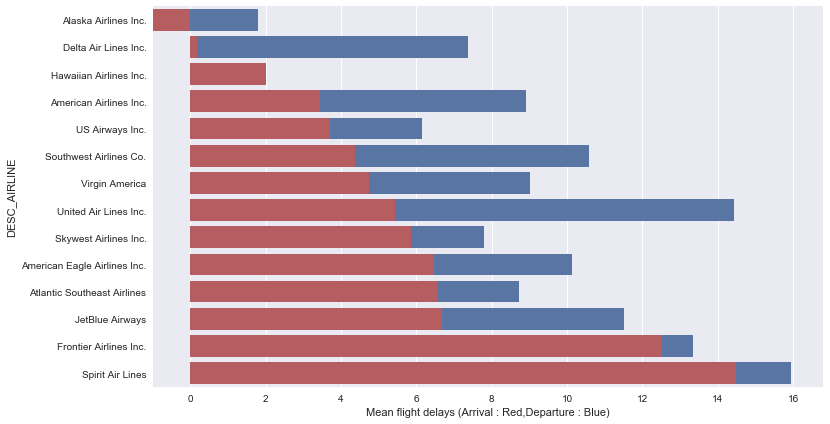

In [19]:
df_delay = pd.DataFrame(flights_data.groupby('DESC_AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean())
df_delay.sort(['ARRIVAL_DELAY','DEPARTURE_DELAY'],ascending = [1,1],inplace=True)
plt.figure(figsize=(12,7))
sns.set_color_codes("deep")
sns.set_context(font_scale=2.5)
plot = sns.barplot(x='DEPARTURE_DELAY',y=df_delay.index,data = df_delay,color = 'b')
plot = sns.barplot(x='ARRIVAL_DELAY',y=df_delay.index,data = df_delay,color = 'r')
plot.set(xlabel='Mean flight delays (Arrival : Red,Departure : Blue)')
#Alaska Airlines has a negative arrival delay - it arrives before scheduled time on an average.

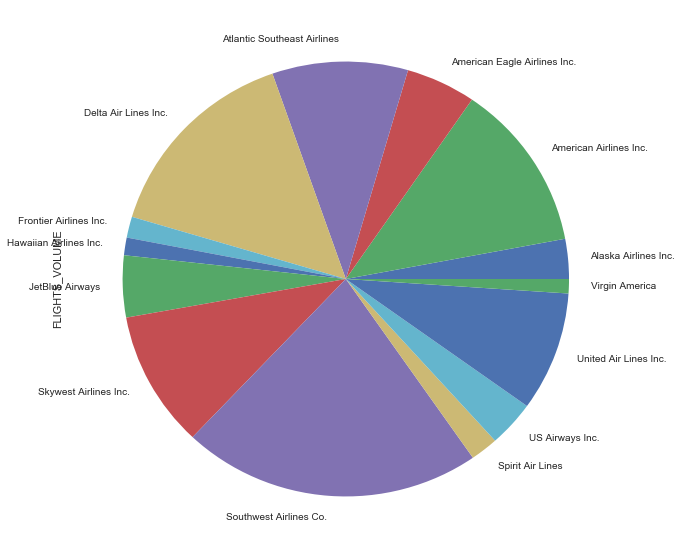

In [117]:
rank_airlines['FLIGHTS_VOLUME'] = flights_data.groupby('DESC_AIRLINE')['FLIGHT_NUMBER'].count()
#Let's change it into ratio of flight_vol/total flight_vol
total = rank_airlines['FLIGHTS_VOLUME'].sum()
rank_airlines['FLIGHTS_VOLUME'] = rank_airlines['FLIGHTS_VOLUME'].apply(lambda x:(x/float(total)))
rank_airlines['FLIGHTS_VOLUME'].plot.pie(figsize=(10,10),rot=45)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning:

Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'



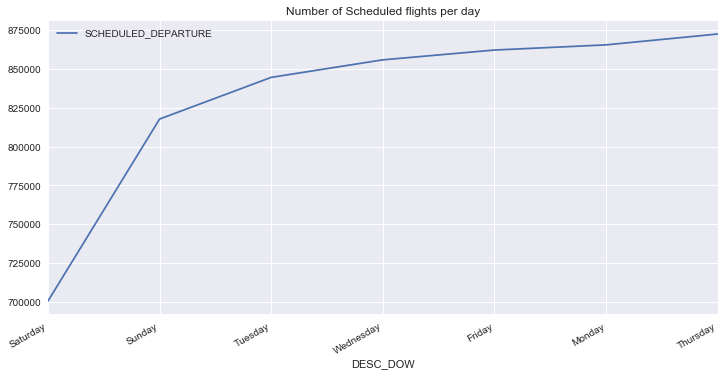

In [20]:
df_busyday = pd.DataFrame(flights_data.groupby('DESC_DOW').count()['SCHEDULED_DEPARTURE'])
df_busyday = df_busyday.sort(['SCHEDULED_DEPARTURE'],ascending = 1)
df_busyday.head()
df_busyday.plot(kind='line',subplots=True,c='r',figsize=(12,6),legend=True)
plt.title('Number of Scheduled flights per day')

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5]),
 <a list of 14 Text xticklabel objects>)

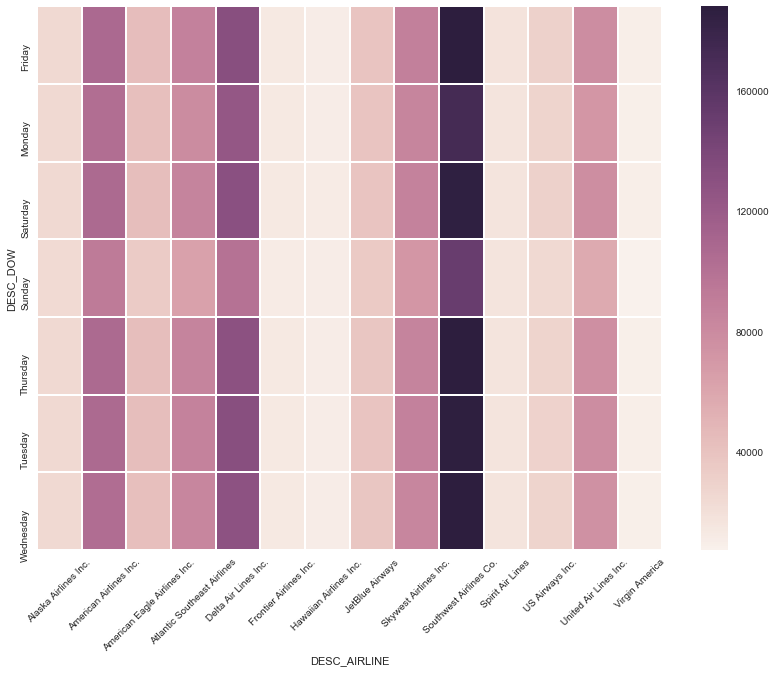

In [119]:
flight_volume_airline_day = flights_data.pivot_table(index="DESC_DOW",columns="DESC_AIRLINE",values="SCHEDULED_DEPARTURE",aggfunc=lambda x:x.count())
#flight_volume_airline_day.head()
fig = plt.figure(figsize=(14,10))
sns.heatmap(flight_volume_airline_day, linecolor="w", linewidths=1)
plt.xticks(rotation=45)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



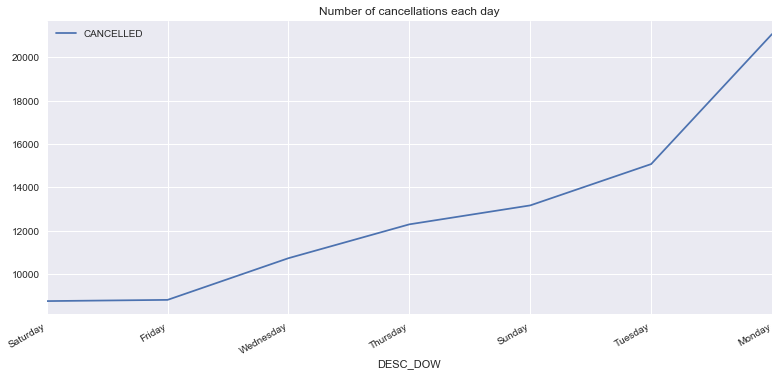

In [21]:
df_cancellations = pd.DataFrame(flights_data.groupby('DESC_DOW').sum()['CANCELLED'])
df_cancellations=df_cancellations.sort(['CANCELLED'],ascending =1)
df_cancellations.head()
df_cancellations.plot(kind='line',figsize=(13,6),subplots=True,legend=True)
plt.title('Number of cancellations each day')

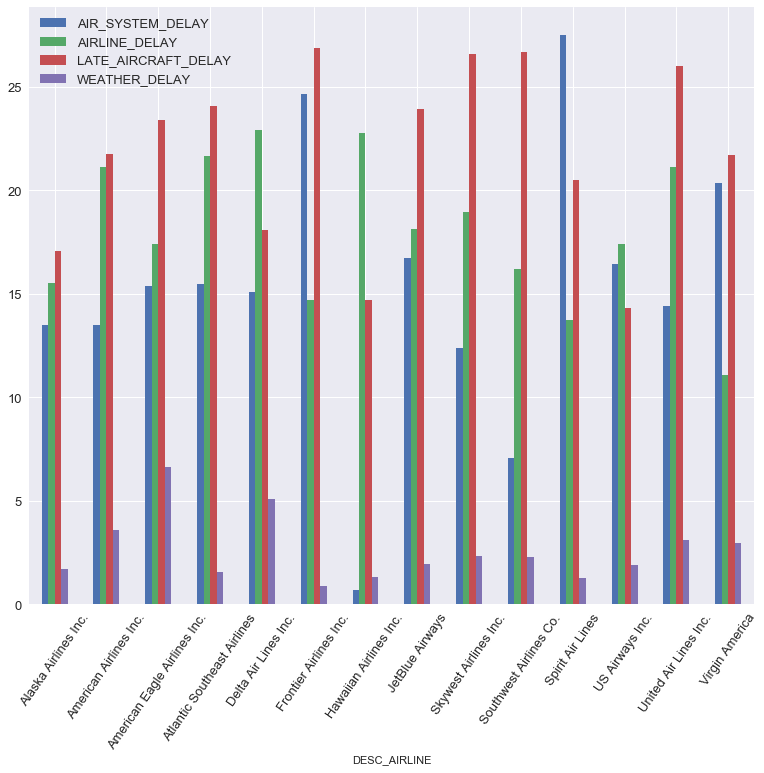

In [121]:
cancellation_reason = pd.DataFrame(flights_data.groupby(['DESC_AIRLINE'])['AIR_SYSTEM_DELAY', 'AIRLINE_DELAY',
                                               'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'].mean())
# flight_volume_airline_day = flights.pivot_table(index="DESC_DOW",columns="DESC_AIRLINE",values="SCHEDULED_DEPARTURE",aggfunc=lambda x:x.count())
cancellation_reason.head()
cancellation_reason.plot.bar(legend = True,figsize = (13,11),rot=55)
plt.legend(loc=2,prop={'size':13})
plt.tick_params(labelsize = 13)

In [11]:
#ds=pd.read_csv('DataSet_Revised.csv')

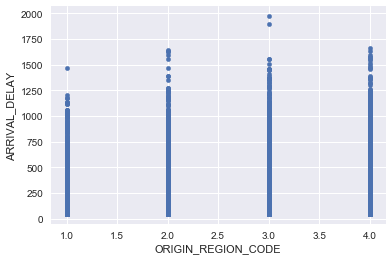

In [11]:

flights_data.plot.scatter('ORIGIN_REGION_CODE','ARRIVAL_DELAY')

In [83]:
import statsmodels.formula.api as smf
# Creating a fitted model in one line
lm = smf.ols(formula='ARRIVAL_DELAY ~ DEPARTURE_DELAY', data=flights_data).fit()
# Print the coefficients
lm.params

Intercept          12.611294
DEPARTURE_DELAY     0.914593
dtype: float64

In [84]:
max_val = max(flights_data['DEPARTURE_DELAY'])
max_val
min_val = min(flights_data['DEPARTURE_DELAY'])
min_val

-22

In [85]:
#create a dataframe with minimum and maximum values of Distance
X_new = pd.DataFrame({'DEPARTURE_DELAY':[max_val,min_val]})

X_new.head()

,DEPARTURE_DELAY
0,1988
1,-22


In [86]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 1830.82247568,    -7.50975549])

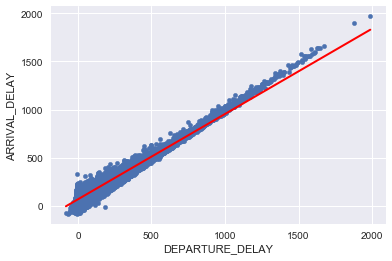

In [80]:
#first plot the observed data
flights_data.plot(kind='scatter', x='DEPARTURE_DELAY', y='ARRIVAL_DELAY')
#flights_data[['DEPARTURE_DELAY']].corr()
#then, plot the least squares line
plt.plot(X_new,preds, c='red',linewidth=2)

In [43]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,12.505453,12.717134
DEPARTURE_DELAY,0.913775,0.915411


In [44]:
# print the p-values for the model coefficients
lm.pvalues

Intercept          0.0
DEPARTURE_DELAY    0.0
dtype: float64

In [45]:
# print the R-squared value for the model
lm.rsquared

0.91879754539048142

In [48]:

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 4.804e+06
Date:                Wed, 11 Apr 2018   Prob (F-statistic):               0.00
Time:                        01:57:57   Log-Likelihood:            -1.9204e+06
No. Observations:              424586   AIC:                         3.841e+06
Df Residuals:                  424584   BIC:                         3.841e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.6113      0.054    2

In [90]:
# predict for a new observation
lm.predict(1000)

array([ 104.72067601])

In [91]:

# calculate the R-squared
lm.score(X, y)

0.00047273828191529699

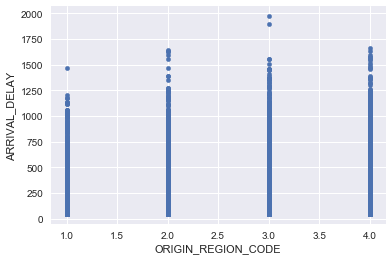

In [27]:
ds.plot.scatter('ORIGIN_REGION_CODE', 'ARRIVAL_DELAY')

In [45]:
import statsmodels.formula.api as smf
# Creating a fitted model in one line
#lm = smf.ols(formula='ARRIVAL_DELAY ~ ORIGIN_REGION_CODE', data=ds).fit()
# Print the coefficients
#lm.params

Intercept             110.323781
ORIGIN_REGION_CODE     -2.177254
dtype: float64

In [46]:
#create a dataframe with minimum and maximum values of Distance
X_new = pd.DataFrame({'ORIGIN_REGION_CODE': [ds.ORIGIN_REGION_CODE.min(),ds.ORIGIN_REGION_CODE.max()]})
X_new.head()

,ORIGIN_REGION_CODE
0,1
1,4


In [47]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 108.14652701,  101.61476489])

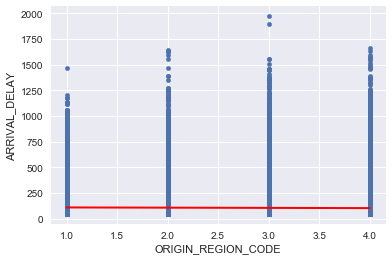

In [48]:
#first plot the observed data
ds.plot(kind='scatter', x='ORIGIN_REGION_CODE', y='ARRIVAL_DELAY')

#then, plot the least squares line
plt.plot(X_new,preds, c='red',linewidth=2)

In [49]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,109.607881,111.039681
ORIGIN_REGION_CODE,-2.417596,-1.936913


In [50]:
# print the p-values for the model coefficients
lm.pvalues

Intercept             0.000000e+00
ORIGIN_REGION_CODE    1.661365e-70
dtype: float64

In [51]:
# print the R-squared value for the model
lm.rsquared

0.00074194788223824748

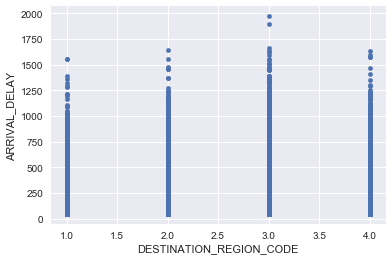

In [28]:
ds.plot.scatter('DESTINATION_REGION_CODE','ARRIVAL_DELAY')

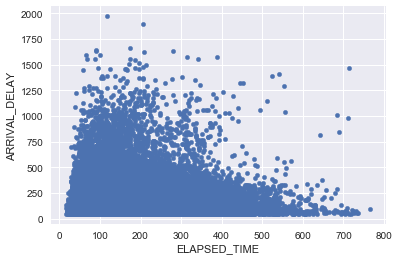

In [29]:
ds.plot.scatter('ELAPSED_TIME','ARRIVAL_DELAY')

In [15]:
#first plot the observed data
ds.plot(kind='scatter', x='ELAPSED_TIME', y='ARRIVAL_DELAY')

#then, plot the least squares line
plt.plot(X_new,preds, c='red',linewidth=2)

NameError: name 'ds' is not defined

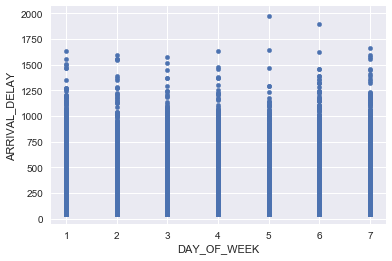

In [30]:
ds.plot.scatter('DAY_OF_WEEK','ARRIVAL_DELAY')

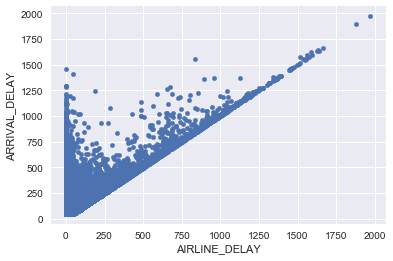

In [53]:
ds.plot.scatter('AIRLINE_DELAY','ARRIVAL_DELAY')

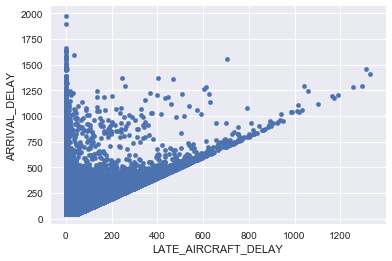

In [54]:
ds.plot.scatter('LATE_AIRCRAFT_DELAY','ARRIVAL_DELAY')

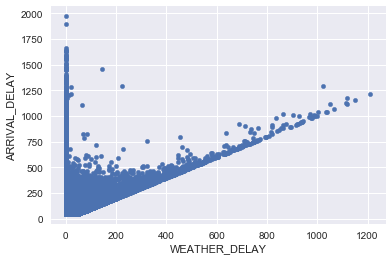

In [55]:
ds.plot.scatter('WEATHER_DELAY','ARRIVAL_DELAY')

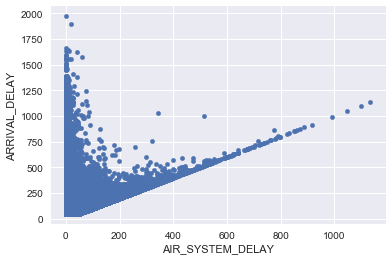

In [56]:
ds.plot.scatter('AIR_SYSTEM_DELAY','ARRIVAL_DELAY')